# Identificar fronteras no lineales

In [ ]:
# vamos a ver cuando los puntos no los podemos separar con una recta. generamos puntos de esta manera:

In [2]:
from sklearn.datasets import make_circles, make_blobs

In [3]:
X, Y = make_circles(100, factor = .1, noise = .1) 

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC

In [5]:
def plt_svc(model, ax=None, plot_support=True):
    """Plot de la función de decisión para una clasificación en 2D con SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    ##Generamos la parrila de puntos para evaluar el modelo
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(yy,xx)
    
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    
    ##Representamos las fronteras y los márgenes del SVC
    ax.contour(X,Y,P, colors="k", levels=[-1,0,1], alpha = 0.5, linestyles=["--", "-", "--"])
        
    if plot_support:
        ax.scatter(model.support_vectors_[:,0], 
                   model.support_vectors_[:,1], 
                   s=300, linewidth=1, facecolors = "blue");
    
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

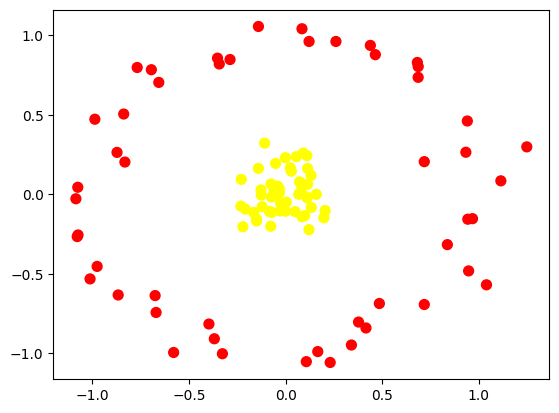

In [6]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")

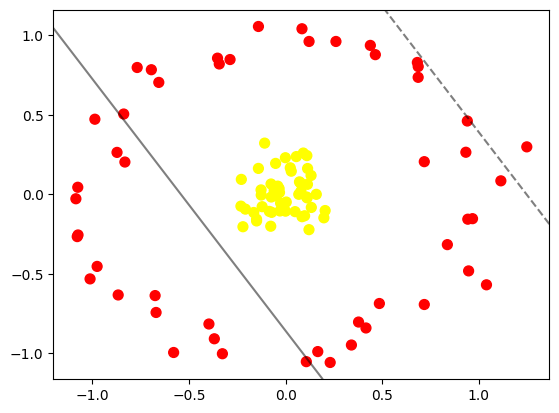

In [7]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(SVC(kernel="linear").fit(X,Y), plot_support=False)

In [ ]:
# nos podemos imaginar que los puntos están en una "planta" superior y así, el plano separador pueda ser un plano que está entre la planta baja y la planta superior

In [ ]:
# elevamos la dimension y hacemos un separador aleatorio
# represetamos una campana de gauss (la punta son los amarillos y los rojos la curva en la parte de abajo)

In [8]:
r = np.exp(-(X**2).sum(1))

In [9]:
r

array([0.94815293, 0.99883889, 0.4483369 , 0.96007521, 0.31044566,
       0.32142504, 0.96898388, 0.98336706, 0.92680007, 0.97357518,
       0.98893143, 0.98217354, 0.99001682, 0.94262102, 0.99629903,
       0.47992364, 0.43965509, 0.27050495, 0.32360938, 0.41564141,
       0.57271035, 0.2929522 , 0.32932973, 0.97595851, 0.36330136,
       0.94933826, 0.30728394, 0.36636474, 0.28699282, 0.34291915,
       0.31561118, 0.33345364, 0.98310784, 0.30148143, 0.39072381,
       0.3134483 , 0.26600512, 0.36751017, 0.98165684, 0.94025316,
       0.36332185, 0.94102661, 0.99770007, 0.29098228, 0.98411649,
       0.99423813, 0.9383029 , 0.95406296, 0.97807136, 0.98898856,
       0.94928725, 0.45552457, 0.45340867, 0.99589894, 0.99755129,
       0.97277045, 0.9794446 , 0.9883802 , 0.33370994, 0.44916934,
       0.94212853, 0.29512466, 0.91374302, 0.42261364, 0.39040833,
       0.37004576, 0.24569699, 0.95507816, 0.98600306, 0.38346082,
       0.99540435, 0.95442932, 0.39557781, 0.31426221, 0.98722

In [10]:
from mpl_toolkits import mplot3d

In [11]:
def plot_3D(elev=30, azim=30, X=X, Y=Y, r=r):     #elevación de 30 grados y acimutal tambien de 30 grados
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:,0], X[:,1],r, c=Y, s= 50, cmap="autumn")
    ax.view_init(elev=elev, azim=azim)
    
    ax.set_xlabel("x[0]")
    ax.set_ylabel("y[1]")
    ax.set_zlabel("r")
    

In [12]:
from ipywidgets import interact, fixed

interactive(children=(Dropdown(description='elev', index=4, options=(-90, -60, -30, 0, 30, 60, 90), value=30),…

<function __main__.plot_3D(elev=30, azim=30, X=array([[-1.41011181e-03,  2.30732501e-01],
       [-3.19042495e-02,  1.19959978e-02],
       [-2.87919804e-01,  8.48122928e-01],
       [-5.20011707e-02,  1.95037265e-01],
       [ 2.30445728e-01, -1.05671243e+00],
       [-1.40935269e-01,  1.05599630e+00],
       [ 1.31539589e-01,  1.19183213e-01],
       [ 1.12814430e-01,  6.36059887e-02],
       [ 9.13163199e-02,  2.60151383e-01],
       [ 8.46521501e-02, -1.40050872e-01],
       [ 7.59922354e-02,  7.31810139e-02],
       [-7.26611663e-02, -1.12728067e-01],
       [-7.57688936e-02,  6.55165658e-02],
       [-2.31632272e-01, -7.37390905e-02],
       [-2.60457100e-02, -5.50404775e-02],
       [-8.32262268e-01,  2.03636432e-01],
       [-3.97214992e-01, -8.14852742e-01],
       [-1.01257531e+00, -5.31183714e-01],
       [ 9.47071098e-01, -4.80910012e-01],
       [ 4.15739148e-01, -8.39698370e-01],
       [ 7.17614800e-01,  2.05922769e-01],
       [-7.68631110e-01,  7.98092760e-01],
       

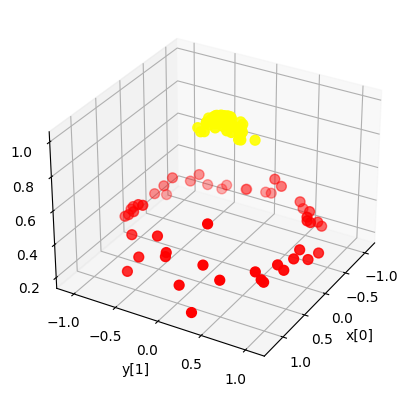

In [13]:
interact(plot_3D, elev=[-90,-60,-30,0,30,60,90], 
         azim=[-180,-150,-120,-90,-60,-30,0,30,60,90,120,150, 180], 
         X = fixed(X), Y = fixed(Y), r = fixed(r))

In [ ]:
# ahora es sencillo encontrar el plano separador. estará a una altura aprox. de 0.7. 
#pero ojo, en este ejemplo era fácil separar los puntos, si los puntos no hubieran estado tan claramente separados, no habriamos podido elevar el espacio vectorial y encontrar el hiperplano separador

In [ ]:
# como hemos dicho, no siempre vamos a poder separar así los puntos. al final, una estrategia para intentar resolver este problema será no siempre tratr de buscar un kernel lineal, 
# sino una transforamación del kernel basandonos en alguna relacion entre los pares de puntos que teenmos en el dataset para intentar encontrar cual es la forma de separarlos que mas se ajhusta a nuestras necesidades. 
# el problema de esta estrategia es que proyectar n puntos en n dimensiones totalmente separadas puede ser computacionalmente muy costoso.
# entonces el ir elevando las dimensiones no siempre sera una salida si no que se puede llevar a cabo un pequeño truco de intentar transformar los datos de forma implicita sin necesidad de 
# construir una representación en un espacio n dimensional sobre el cual luego proyectar de vuelta del que partiamos

# el truco del kernel se construye directamente con la svm y es una de las razones por las que este metodo es tan potente. simplemente nosotros mismos le vamos a pasar otro parametro de kernel y vamos a intentar que en algun 
# espacio de dimension superior sí que haya una separacion lineal pero que la proyecccion en nuestro espacio de vuelta bidimensioanl se convierta en una figura que seamos capaces de ver

# aplicamos un svm cambiando del kernel lineal al radial basis function RBF (busca formas circulares que separa nuestros datos)

In [14]:
rbf = SVC(kernel="rbf", C=1E6)
rbf.fit(X,Y)

SVC(C=1000000.0)

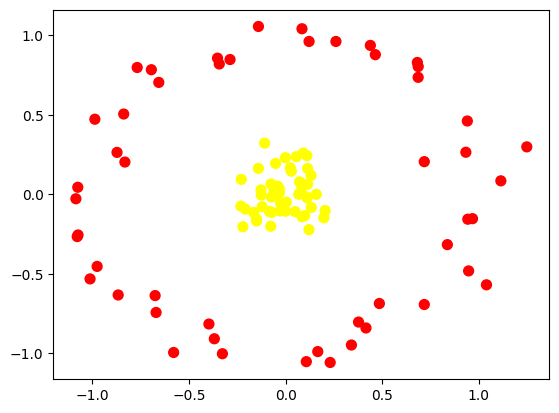

In [15]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")

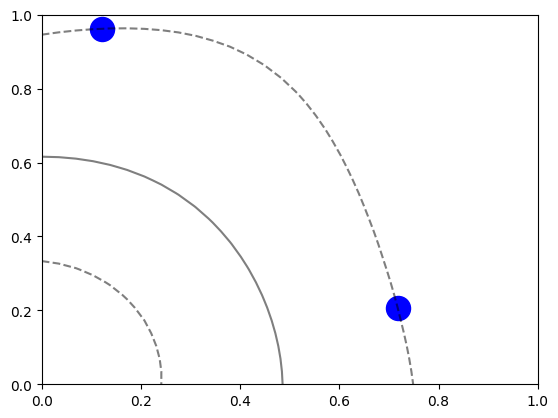

In [16]:
plt_svc(rbf)

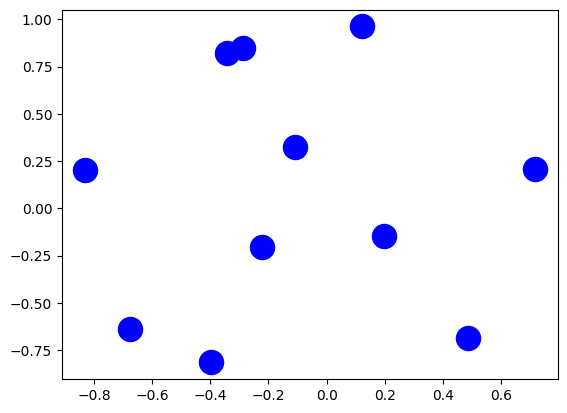

In [17]:
plt.scatter(rbf.support_vectors_[:,0], rbf.support_vectors_[:,1], s=300, lw=1, facecolors="blue")

In [ ]:
# y los tres juntos...

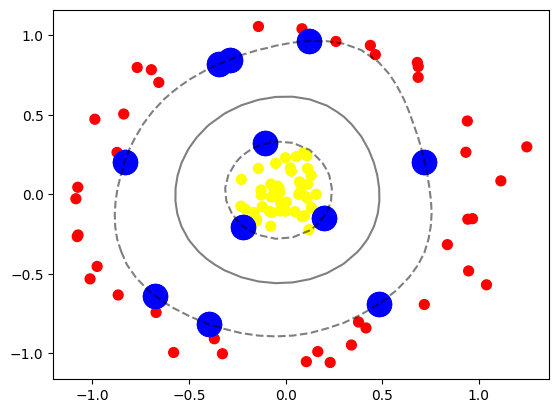

In [18]:
plt.scatter(X[:,0], X[:,1], c=Y, s=50, cmap="autumn")
plt_svc(rbf)
plt.scatter(rbf.support_vectors_[:,0], rbf.support_vectors_[:,1], s=300, lw=1, facecolors="blue")

Para ver más documentacion sobre el svc

buscamos "svc python" en google

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

y nos vamos a kernel dentro de los parámetros

In [ ]:
# podremos elegir uno u otro dependiendo de la estrucutra de los datos que tengamos

In [ ]:
# podría ocurrirnos que tuvieramos datos donde no sea claro dónde caerían y podría ser que hubiera puntos mal clasificados

## Ajustar los parámetros de SVM

In [31]:
X, Y = make_blobs(n_samples=100, centers = 2, random_state=0, cluster_std=1.2)   # uso cluster_std con un numero más grande que en el anterior

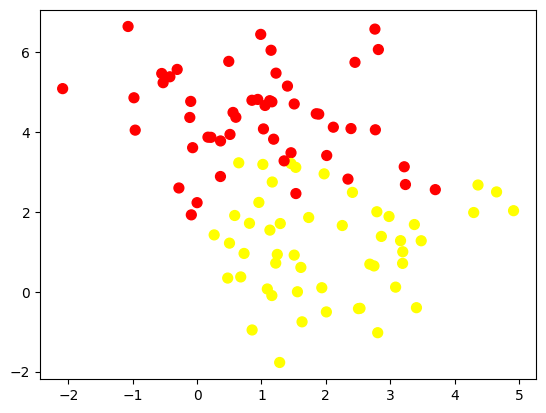

In [32]:
plt.scatter(X[:,0], X[:,1], c = Y, s=50, cmap="autumn")

In [ ]:
# vemos que es imposible poder trazar una linea que separe ambas distribuciones

In [ ]:
# la svm tiene un factor que relaja las restricciones de margen: permite que algunos puntos estén en el margen cambiado, lo cual permite un mejor ajuste a expensas de que algun punto quede mal clasificado
# esto lo controlamos con la C (penalty parameter)

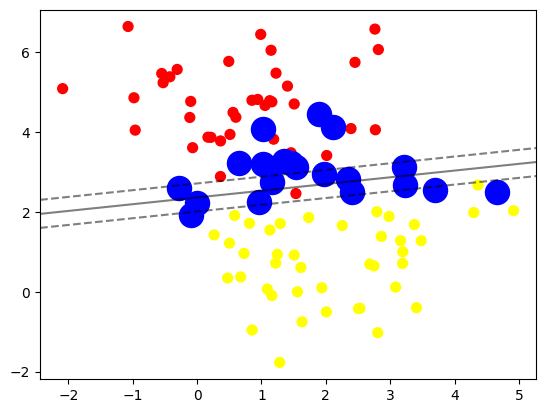

In [33]:
plt.scatter(X[:,0], X[:,1], c = Y, s=50, cmap="autumn")
model = SVC(kernel="linear", C=1E6)
model.fit(X,Y)
plt_svc(model)

In [ ]:
# si pongo un C muy alto, nos encuentra la linea pero nos da muchos puntos mal clasificados

In [ ]:
# si vamos probando con C podremos llegar a un resultado mas ajustado con menos puntos mal clasificados

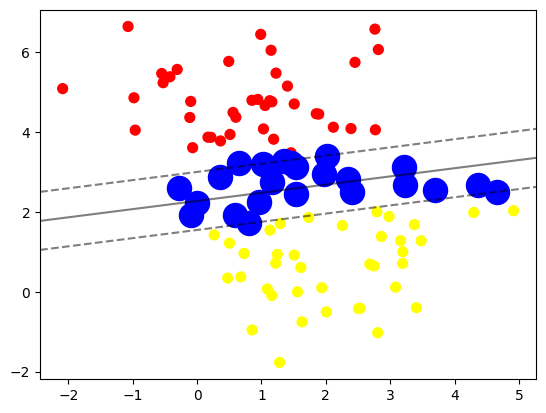

In [37]:
X, Y = make_blobs(n_samples=100, centers = 2, random_state=0, cluster_std=1.2)
plt.scatter(X[:,0], X[:,1], c = Y, s=50, cmap="autumn")
model = SVC(kernel="linear", C=10)
model.fit(X,Y)
plt_svc(model)

In [ ]:
# aquí hago un ejemplo con una std menor (los grupos van a estar más separados)

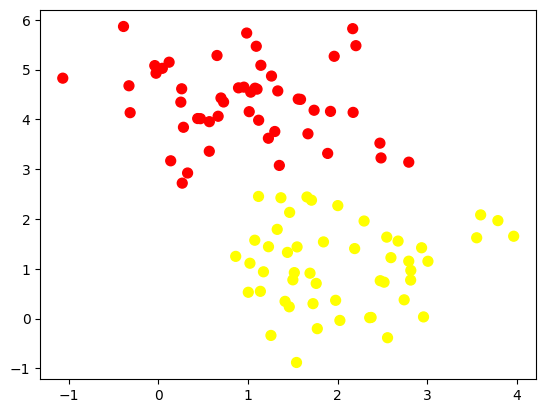

In [24]:
X, Y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
plt.scatter(X[:,0], X[:,1], c = Y, s=50, cmap="autumn")

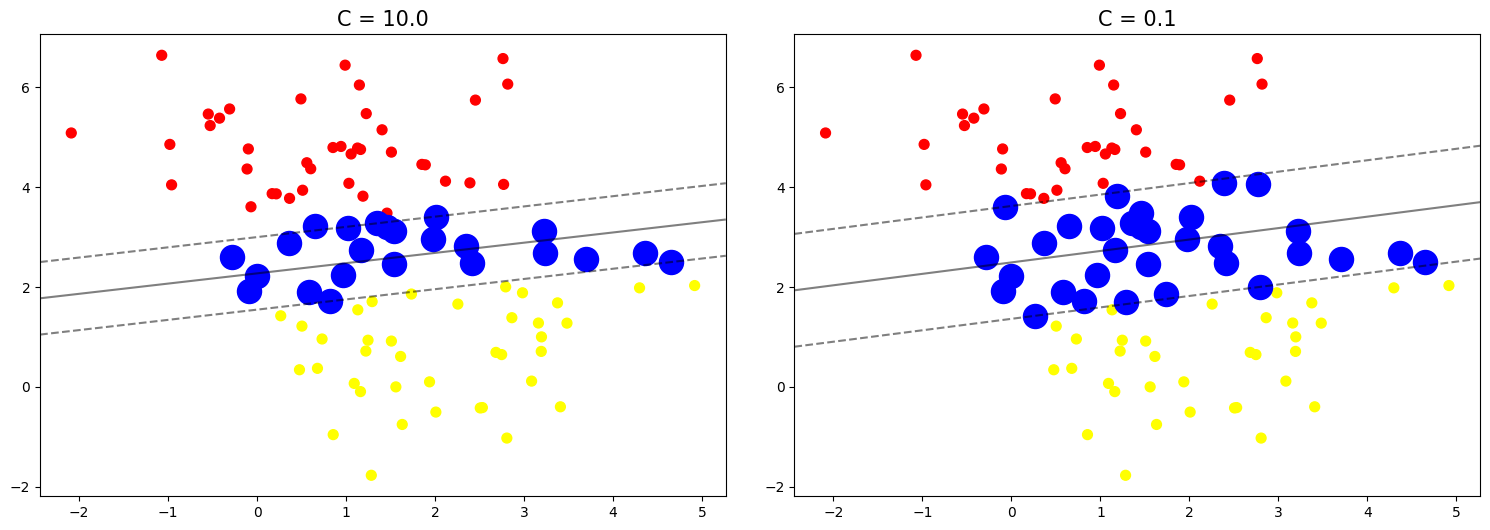

In [39]:
fig, ax = plt.subplots(1,2, figsize=(16,6))
fig.subplots_adjust(left = 0.05, right = 0.95, wspace=0.1)

for ax_i, C in zip(ax, [10, 0.1]):
    model = SVC(kernel="linear", C=C)
    model.fit(X,Y)
    ax_i.scatter(X[:,0],X[:,1], c = Y, s = 50, cmap="autumn")    # c = Y categoriza los puntos, el cmap les da el color a cada grupo
    plt_svc(model, ax_i)
    ax_i.set_title("C = {0:.1f}".format(C), size = 15)

In [ ]:
# en la izquierda hay un margen rigido, duro. en el de la derecha es mas laxo
# cuál será el C optimo? pues dependra de los dataset y habrá que usar variacion cruzada, o algun procedimiento similar para tunear estos parametros y validar que el modelo es correcto 